# **Facial Emotion Recognition**






Dataset - CK+ dataset


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data Visualization

* powerful visualization tools => matplotlib, seaborn
      1. matplotlib works on pandas dataframe
      2.  matplotlib => basic ploting =>bars,pie,scatter, lines etc.. => used for MATLAB like graphs
      3. seaborn => statistical ploting => depends on matplotlib...high level => provides default templates

In [2]:
""" IMPORT ALL DEPENDENCIES"""



import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns

In [3]:
df = pd.read_csv("/content/ckextended.csv")
df.head()

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


In [4]:
df

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training
...,...,...,...
915,5,87 86 88 92 92 127 231 248 251 253 254 254 254...,PrivateTest
916,5,21 24 26 28 27 28 30 8 0 0 0 0 0 0 1 4 37 42 4...,PrivateTest
917,5,76 40 31 38 28 34 38 36 41 36 46 38 44 26 45 5...,PrivateTest
918,5,114 87 16 29 17 25 30 34 37 35 45 93 63 80 73 ...,PrivateTest


In [5]:
df.shape

(920, 3)

## **Plotting emotion**

<Axes: xlabel='emotion', ylabel='count'>

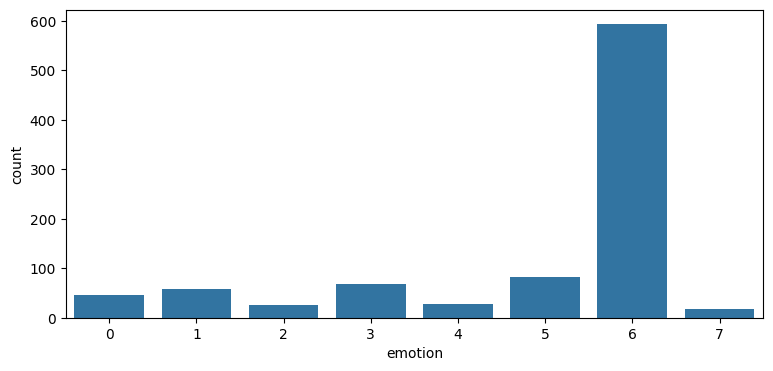

In [6]:
""" matplotlib => to define size , sns => to use counterplot """

plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=df)

In [7]:
df['emotion'].value_counts()

,count
emotion,
6,593
5,83
3,69
1,59
0,45
4,28
2,25
7,18


## **Plotting Usage**

<Axes: xlabel='Usage', ylabel='count'>

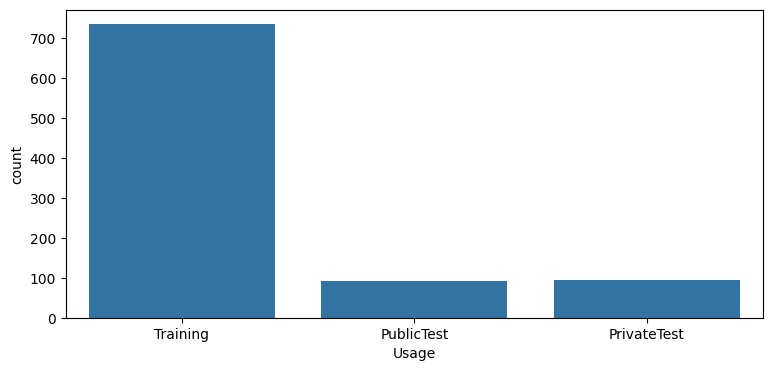

In [8]:
plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=df)

In [9]:
df['Usage'].value_counts()

,count
Usage,
Training,734
PrivateTest,95
PublicTest,91


 **Intuition**

* % matplotlib inline ==> magic cmd to setup IPython to display and store figures in notebooks
* dataframe ==>pd.read_csv() , .head(), .tail(), .shape
* count ==>  sns.countplot(x=,df) -> for graphs  ; df[col].value_counts() -> to display count values


# PreProcessing

In [10]:
# Step 2: parse into a *new* column
def preprocess_pixels(pix_str):
    if not isinstance(pix_str, str):
        return None
    vals = pix_str.strip().split()           # split on whitespace
    if len(vals) != 48*48:
        return None
    arr = np.array(vals, dtype='float32')
    return arr.reshape(48, 48, 1)            # no /255 here

df['pixels_array'] = df['pixels'].apply(preprocess_pixels)

# Step 3: drop only the rows that truly failed parsing
df = df.dropna(subset=['pixels_array'])

# Step 4: stack that new column
X = np.stack(df['pixels_array'].tolist(), axis=0)
y = to_categorical(df['emotion'], num_classes=8) # Changed num_classes to 8

**Note:** The `to_categorical` function and the model's output layer have been adjusted to include emotion label 7, resulting in 8 classes in total. The emotion mapping has also been updated to include label 7 as "Unknown".

In [11]:
print("Shape of X:", X.shape)

Shape of X: (920, 48, 48, 1)


In [12]:
print("Type of X:", type(X))

Type of X: <class 'numpy.ndarray'>


In [13]:
print("First image in X:", X[0])

First image in X: [[[ 36.]
  [ 39.]
  [ 35.]
  ...
  [ 20.]
  [ 38.]
  [ 20.]]

 [[ 38.]
  [ 36.]
  [ 41.]
  ...
  [ 15.]
  [ 24.]
  [ 55.]]

 [[ 39.]
  [ 37.]
  [ 41.]
  ...
  [  9.]
  [ 12.]
  [ 49.]]

 ...

 [[219.]
  [243.]
  [207.]
  ...
  [218.]
  [206.]
  [247.]]

 [[229.]
  [228.]
  [212.]
  ...
  [229.]
  [215.]
  [233.]]

 [[254.]
  [247.]
  [235.]
  ...
  [193.]
  [251.]
  [253.]]]


In [14]:
print("Number of dimensions in X[0]:", X[0].ndim)

Number of dimensions in X[0]: 3


In [15]:
print("Shape of y:", y.shape)

Shape of y: (920, 8)


In [16]:
print("Type of y:", type(y))

Type of y: <class 'numpy.ndarray'>


In [17]:
print("First label in y:", y[0])

First label in y: [0. 0. 0. 0. 0. 0. 1. 0.]


In [18]:
print("Number of dimensions in y:", y.ndim)

Number of dimensions in y: 2


In [19]:
import numpy as np

# convert one-hot vectors back to integer labels
labels = np.argmax(y, axis=1)

# count how many samples you have of each label
unique, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(unique, counts))

# map numeric labels to FER emotion names
emotion_map = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral",
    7: "Unknown" # Added label 7
}

for label, count in label_counts.items():
    print(f"{emotion_map.get(label, label)}: {count} samples")

Angry: 45 samples
Disgust: 59 samples
Fear: 25 samples
Happy: 69 samples
Sad: 28 samples
Surprise: 83 samples
Neutral: 593 samples
Unknown: 18 samples


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# 1. Integer labels
labels = np.argmax(y, axis=1)

# 2. Set up augmentation pipeline
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# 3. Grab your 4 Disgust examples (label == 1)
idx_disgust = np.where(labels == 1)[0]
X_disgust = X[idx_disgust]
y_disgust = y[idx_disgust]   # <-- use idx_disgust here, not idx_dis

# 4. Generate ~80 new Disgust images
aug_X, aug_y = [], []
target_aug = 80
for img, onehot in zip(X_disgust, y_disgust):
    batch = img.reshape((1,)+img.shape)    # datagen needs a batch dim
    for new_img in datagen.flow(batch, batch_size=1):
        aug_X.append(new_img[0])
        aug_y.append(onehot)
        if len(aug_X) >= target_aug:
            break
    if len(aug_X) >= target_aug:
        break

aug_X = np.array(aug_X)
aug_y = np.array(aug_y)

# 5. Stack back onto original data
X = np.vstack([X, aug_X])
y = np.vstack([y, aug_y])

# 6. verify new counts
new_labels = np.argmax(y, axis=1)
unique, counts = np.unique(new_labels, return_counts=True)
print("Post-augmentation class counts:")
for cls, cnt in zip(unique, counts):
    print(f"  Class {cls}: {cnt} samples")


Post-augmentation class counts:
  Class 0: 45 samples
  Class 1: 139 samples
  Class 2: 25 samples
  Class 3: 69 samples
  Class 4: 28 samples
  Class 5: 83 samples
  Class 6: 593 samples
  Class 7: 18 samples


# Splitting the dataset

In [21]:
# First, perform the train-test (or train-validation) split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=np.argmax(y, axis=1)
)

In [22]:
# Convert grayscale to RGB by replicating the channel
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_val_rgb = np.repeat(X_val, 3, axis=-1)

#resize

# import cv2
# X_train_resized = np.stack([
#     cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
#     for img in X_train_rgb
# ], axis=0)
# X_val_resized = np.stack([
#     cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
#     for img in X_val_rgb
# ], axis=0)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define basic data generator
train_datagen = ImageDataGenerator(
    # rescale=1./255,
    # zoom_range=0.1,
    # shear_range=0.1,
    # brightness_range=(0.9, 1.1),
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    # preprocessing_function=None  # We'll apply preprocess_input separately after MixUp/CutMix
)

# Define MixUp function
def mixup(X, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    idx = np.random.permutation(len(X))
    return lam * X + (1 - lam) * X[idx], lam * y + (1 - lam) * y[idx]

# Define CutMix function
def cutmix(X, y, alpha=1.0):
    lam = np.random.beta(alpha, alpha)
    idx = np.random.permutation(len(X))

    batch_size, h, w, _ = X.shape
    rx = np.random.randint(w)
    ry = np.random.randint(h)
    rw = int(w * np.sqrt(1 - lam))
    rh = int(h * np.sqrt(1 - lam))

    x1 = np.clip(rx - rw // 2, 0, w)
    y1 = np.clip(ry - rh // 2, 0, h)
    x2 = np.clip(rx + rw // 2, 0, w)
    y2 = np.clip(ry + rh // 2, 0, h)

    X_new = np.copy(X)
    for i in range(batch_size):
        X_new[i, y1:y2, x1:x2, :] = X[idx[i], y1:y2, x1:x2, :]

    lam_adjusted = 1 - ((x2 - x1) * (y2 - y1)) / (w * h)
    y_new = lam_adjusted * y + (1 - lam_adjusted) * y[idx]

    return X_new, y_new

# Hybrid MixUp + CutMix Generator
def hybrid_mixup_cutmix_resize_generator(datagen, X, y, batch_size=64, target_size=(224, 224)):
    while True:
        for batch_X, batch_y in datagen.flow(X, y, batch_size=batch_size):
            # Resize images to target size
            resized_X = np.array([cv2.resize(img, target_size) for img in batch_X])
            if np.random.rand() < 0.1:   # 30% chance MixUp, 70% CutMix then 10-90
                Xb, yb = mixup(resized_X, batch_y)
            else:
                Xb, yb = cutmix(resized_X, batch_y)
            # Preprocess images before returning
            yield preprocess_input(Xb), yb

# Train generator (with hybrid augmentations)
train_generator = hybrid_mixup_cutmix_resize_generator(
    train_datagen,
    X_train_rgb,
    y_train,
    batch_size=64,
    target_size=(224, 224)
)


In [24]:
# Resize Generator for Validation
def resize_generator(datagen, X, y, batch_size=64, target_size=(224, 224)):
    while True:
        for batch_X, batch_y in datagen.flow(X, y, batch_size=batch_size, shuffle=False):
            resized_X = np.array([cv2.resize(img, target_size) for img in batch_X])
            yield resized_X, batch_y


# Validation Data Generator (no geometric augmentation, but same scaling)
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_generator = resize_generator(
    val_datagen,
    X_val_rgb,
    y_val,
    batch_size=64,
    target_size=(224,224)
)

In [25]:
print("Shape of RGB training data:", X_train_rgb.shape)
print("Shape of RGB validation data:", X_val_rgb.shape)
print("Shape of RGB validation data:", X_val_rgb.shape)

Shape of RGB training data: (800, 48, 48, 3)
Shape of RGB validation data: (200, 48, 48, 3)
Shape of RGB validation data: (200, 48, 48, 3)


In [26]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of y_train: (800, 8)
Shape of y_val: (200, 8)


In [27]:
# Check the pixel value range after scaling for the training set
print("\nPixel value range in X_train_rgb:")
print("Min:", X_train_rgb.min())
print("Max:", X_train_rgb.max())


Pixel value range in X_train_rgb:
Min: 0.0
Max: 255.0


In [28]:
# Check the pixel value range after scaling for the validation set
print("\nPixel value range in X_val_scaled:")
print("Min:", X_val_rgb.min())
print("Max:", X_val_rgb.max())


Pixel value range in X_val_scaled:
Min: 0.0
Max: 255.0


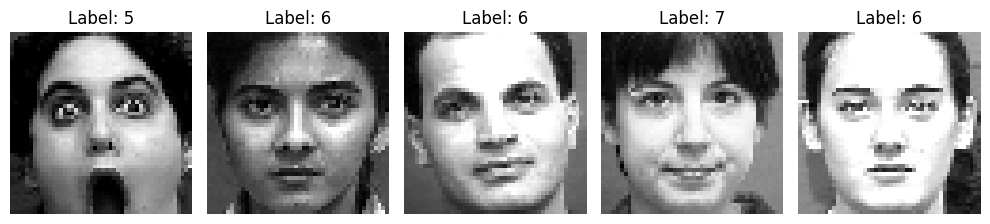

In [29]:
# Visualize a few of the scaled training images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i].reshape(48, 48), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Defining Model

In [30]:
num_classes = 8 # Changed to 8 to include emotion 7
input_shape = (224, 224, 3)

In [31]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Activation, Conv1D, Reshape, multiply
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers

# ECA block
def eca_block(input_tensor, gamma=2, b=1):
    # 1) Squeeze: global average pool, shape=(batch, C)
    x = GlobalAveragePooling2D()(input_tensor)
    x = Reshape((-1, 1))(x)  # shape=(batch, C, 1)

    # 2) Compute adaptive kernel size
    channels = input_tensor.shape[-1]
    t = int(abs((tf.math.log(tf.cast(channels, tf.float32))
                  / tf.math.log(2.0) + b) / gamma))
    k = t if t % 2 else t + 1  # make sure k is odd

    # 3) 1D conv for cross-channel interaction
    x = Conv1D(1, kernel_size=k, padding='same', use_bias=False)(x)
    x = Activation('sigmoid')(x)
    x = Reshape((1, 1, channels))(x)  # shape=(batch, 1, 1, C)

    # 4) Scale the input feature map
    return multiply([input_tensor, x])


# Load the pre-trained ResNet50 model, excluding the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the last few convolutional blocks for fine-tuning
for layer in base_model.layers[-50:]:  # You can adjust how many layers to unfreeze
    layer.trainable = True

# Add custom classification layers on top
x = base_model.output
x = eca_block(x)
x = GlobalAveragePooling2D()(x)

# First Dense block with L2 regularization, Batch Normalization, and Dropout
x = Dense(512, kernel_regularizer=l2(1e-4))(x)  # L2 Regularization
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Second Dense block with L2 regularization, Batch Normalization, and Dropout
x = Dense(256, kernel_regularizer=l2(1e-4))(x)  # L2 Regularization
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.6)(x)

# Output layer
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with label smoothing and a smaller learning rate
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)
model.compile(
    optimizer=Adam(learning_rate=5e-5),
    loss=loss_fn,
    metrics=['accuracy']
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,773,263 (94.50 MB)

 Trainable params: 18,134,543 (69.18 MB)

 Non-trainable params: 6,638,720 (25.32 MB)

In [32]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy

# 1) Convert one-hot labels to class indices
y_indices = np.argmax(y_train, axis=1)

# 2) Compute class weights
# class_weights = dict(enumerate(
#     compute_class_weight(
#         class_weight='balanced',
#         classes=np.unique(y_indices),
#         y=y_indices
#     )
# ))

# Define EarlyStopping callback (monitor val_loss to avoid overfitting)
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

# 4) (Optional) Define ReduceLROnPlateau callback (commented out for now)
# from tensorflow.keras.callbacks import ReduceLROnPlateau
# reduce_lr = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=3,
#     min_lr=1e-7,
#     verbose=1
# )

# Define ModelCheckpoint callback to save the best model based on val_accuracy
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# 6) Learning-rate schedule and optimizer (CosineDecay + AdamW)
steps_per_epoch = len(X_train_rgb) // 64
total_steps = steps_per_epoch * 30  # for 30 epochs

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-4,
    decay_steps=total_steps,
    alpha=1e-6
)

from tensorflow.keras.optimizers import Adam
optimizer = Adam( learning_rate=lr_schedule)

# 7) Loss with label smoothing
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

# 8) Compile the model
model.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)


In [33]:
# # Train the model
# # epochs = 50  # You can adjust the number of epochs
# # batch_size = 32 # You can adjust the batch size
# steps_per_epoch = len(X_train_rgb) // 64
# history2 = model.fit(
#     train_generator,
#     steps_per_epoch=steps_per_epoch,
#     epochs=30,
#     validation_data=val_generator,
#     validation_steps=len(X_val_rgb) // 64,
#     class_weights=class_weights,
#     callbacks=[early_stopping, lr_scheduler],
#     verbose=1
# )


# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(X_val_rgb) // 64,
    # class_weight=class_weights,
    # callbacks=[early_stopping],     # Only EarlyStopping needed if CosineDecay
    callbacks=[early_stopping,checkpoint],
    verbose=1
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.0674 - loss: 3.6360
Epoch 1: val_accuracy improved from -inf to 0.05729, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 47s 836ms/step - accuracy: 0.0678 - loss: 3.6361 - val_accuracy: 0.0573 - val_loss: 2.2125
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - accuracy: 0.0930 - loss: 3.4619
Epoch 2: val_accuracy improved from 0.05729 to 0.20833, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 394ms/step - accuracy: 0.0935 - loss: 3.4599 - val_accuracy: 0.2083 - val_loss: 2.1096
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.1376 - loss: 3.0787
Epoch 3: val_accuracy improved from 0.20833 to 0.37500, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 442ms/step - accuracy: 0.1395 - loss: 3.0715 - val_accuracy: 0.3750 - val_loss: 2.0226
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.2375 - loss: 2.6092
Epoch 4: val_accuracy improved from 0.37500 to 0.52083, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step - accuracy: 0.2414 - loss: 2.6066 - val_accuracy: 0.5208 - val_loss: 1.9082
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.3528 - loss: 2.4028
Epoch 5: val_accuracy improved from 0.52083 to 0.60417, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - accuracy: 0.3541 - loss: 2.3971 - val_accuracy: 0.6042 - val_loss: 1.8567
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.4650 - loss: 2.4033
Epoch 6: val_accuracy improved from 0.60417 to 0.76562, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.4696 - loss: 2.3902 - val_accuracy: 0.7656 - val_loss: 1.7606
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.5083 - loss: 2.2082
Epoch 7: val_accuracy did not improve from 0.76562
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 634ms/step - accuracy: 0.5116 - loss: 2.2048 - val_accuracy: 0.7647 - val_loss: 1.7483
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.5449 - loss: 2.1472
Epoch 8: val_accuracy did not improve from 0.76562
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.5490 - loss: 2.1372 - val_accuracy: 0.7135 - val_loss: 1.8497
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.5577 - loss: 2.1376
Epoch 9: val_accuracy did not improve from 0.76562
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.5601 - loss: 2.1362 - val_accuracy: 0.7279 - val_loss: 1.8309
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.6460 - loss: 1.9507
Epoch 10: val_accuracy improved from

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - accuracy: 0.6446 - loss: 1.9521 - val_accuracy: 0.8177 - val_loss: 1.7549
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.6381 - loss: 2.0617
Epoch 11: val_accuracy improved from 0.81771 to 0.83824, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 396ms/step - accuracy: 0.6390 - loss: 2.0518 - val_accuracy: 0.8382 - val_loss: 1.6544
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.6961 - loss: 1.8886
Epoch 12: val_accuracy improved from 0.83824 to 0.85417, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - accuracy: 0.6990 - loss: 1.8783 - val_accuracy: 0.8542 - val_loss: 1.5304
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.7011 - loss: 1.6704
Epoch 13: val_accuracy improved from 0.85417 to 0.86029, saving model to best_model.h5


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 362ms/step - accuracy: 0.7006 - loss: 1.6774 - val_accuracy: 0.8603 - val_loss: 1.4005
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.7425 - loss: 1.6389
Epoch 14: val_accuracy did not improve from 0.86029
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 362ms/step - accuracy: 0.7416 - loss: 1.6423 - val_accuracy: 0.8542 - val_loss: 1.3152
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.7397 - loss: 1.5390
Epoch 15: val_accuracy did not improve from 0.86029
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.7374 - loss: 1.5453 - val_accuracy: 0.8603 - val_loss: 1.2801
Epoch 16/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.7149 - loss: 1.9123
Epoch 16: val_accuracy did not improve from 0.86029
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.7156 - loss: 1.9039 - val_accuracy: 0.8542 - val_loss: 1.2499
Epoch 17/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.7071 - loss: 1.7565
Epoch 17: val_accuracy did n

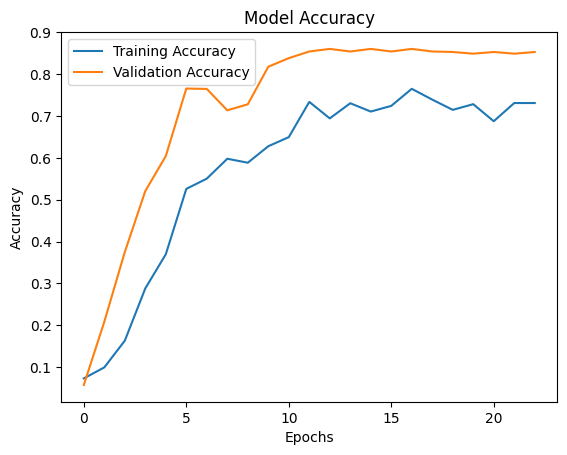

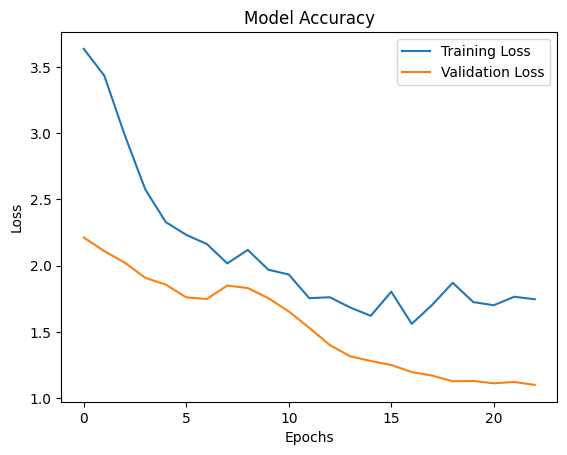

In [34]:
# Example to plot the training and validation accuracy over epochs
#  import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()


In [35]:
from tensorflow.keras.models import load_model

model = load_model("best_model.h5")  # or use the correct path from ModelCheckpoint


In [36]:
# Prepare the datasets
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

def preprocess(img, label):
    img = tf.image.resize(img, (224, 224))
    img = preprocess_input(img)
    return img, label

# Training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_rgb, y_train))
train_dataset = train_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_rgb, y_val))
val_dataset = val_dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Load the model
from tensorflow.keras.models import load_model
model = load_model('best_model.h5')

# Predict on training set and calculate accuracy
import numpy as np
from sklearn.metrics import accuracy_score

y_train_probs = model.predict(train_dataset)
y_train_pred = np.argmax(y_train_probs, axis=1)
y_train_true = np.argmax(y_train, axis=1)
train_accuracy = accuracy_score(y_train_true, y_train_pred)

# Predict on validation set and calculate accuracy
y_val_probs = model.predict(val_dataset)
y_val_pred = np.argmax(y_val_probs, axis=1)
y_val_true = np.argmax(y_val, axis=1)
val_accuracy = accuracy_score(y_val_true, y_val_pred)

# Print both accuracy
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 665ms/step
Training Accuracy: 0.8625
Validation Accuracy: 0.8700


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_val_true, y_val_pred)
precision = precision_score(y_val_true, y_val_pred, average='weighted')
recall = recall_score(y_val_true, y_val_pred, average='weighted')
f1 = f1_score(y_val_true, y_val_pred, average='weighted')

# Print scores
print(f"Validation Accuracy : {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted)   : {recall:.4f}")
print(f"F1 Score (weighted) : {f1:.4f}")

Validation Accuracy : 0.8700
Precision (weighted): 0.7905
Recall (weighted)   : 0.8700
F1 Score (weighted) : 0.8282


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [38]:
# Full classification report
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.90      0.93      0.91        28
           2       0.00      0.00      0.00         5
           3       0.81      0.93      0.87        14
           4       0.20      0.20      0.20         5
           5       0.83      0.94      0.88        16
           6       0.90      1.00      0.95       119
           7       0.00      0.00      0.00         4

    accuracy                           0.87       200
   macro avg       0.46      0.50      0.48       200
weighted avg       0.79      0.87      0.83       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


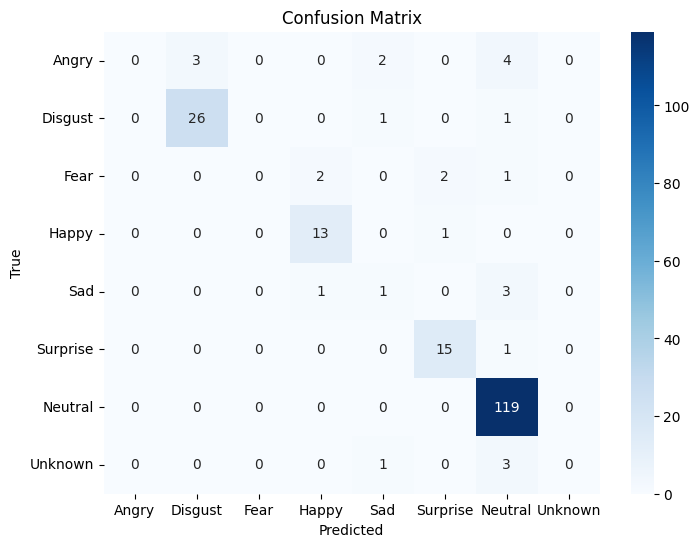

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define class names for FER2013
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral', 'Unknown'] # Added 'Unknown'

# Compute and plot confusion matrix
cm = confusion_matrix(y_val_true, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


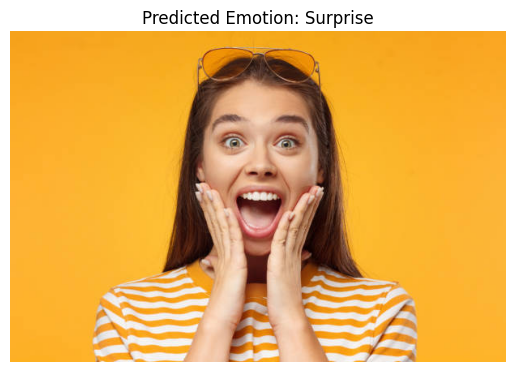

Predicted Class Index: 5
Predicted Emotion: Surprise


In [40]:
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load your trained model
model = load_model('best_model.h5')

# Load the image you uploaded
img_path = '/content/happy3.jpg'
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb, (224, 224))
img_preprocessed = preprocess_input(img_resized.astype(np.float32))
img_batch = np.expand_dims(img_preprocessed, axis=0)  # Shape: (1, 224, 224, 3)

# Predict
pred_probs = model.predict(img_batch)
pred_class = np.argmax(pred_probs)

# Map index to emotion label
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral', 'Unknown']  # Adjusted to 8 classes
pred_label = class_labels[pred_class]

# Display result
plt.imshow(img_rgb)
plt.title(f"Predicted Emotion: {pred_label}")
plt.axis('off')
plt.show()

print(f"Predicted Class Index: {pred_class}")
print(f"Predicted Emotion: {pred_label}")